# 📝 Exercise M4.05
In the previous notebook we set `penalty="none"` to disable regularization
entirely. This parameter can also control the **type** of regularization to use,
whereas the regularization **strength** is set using the parameter `C`.
Setting`penalty="none"` is equivalent to an infinitely large value of `C`.
In this exercise, we ask you to train a logistic regression classifier using the
`penalty="l2"` regularization (which happens to be the default in scikit-learn)
to find by yourself the effect of the parameter `C`.

We will start by loading the dataset and create the helper function to show
the decision separation as in the previous code.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")
# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [2]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

First, let's create our predictive model.

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="l2"))

Given the following candidates for the `C` parameter, find out the impact of
`C` on the classifier decision boundary. You can import the helper class with
`from helpers.plotting import DecisionBoundaryDisplay` to plot the decision
function boundary. Use the method `from_estimator` from this class.

In [7]:
logistic_regression.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [9]:
from sklearn.model_selection import GridSearchCV
Cs = [0.01, 0.1, 1, 10]
C_grid = {"logisticregression__C": Cs}

modelGS = GridSearchCV(logistic_regression, param_grid=C_grid, cv=5)
modelGS.fit(data_train, target_train)
print(modelGS.best_params_)
accuracyGS = modelGS.score(data_test, target_test)
print(f"{accuracyGS:.3f}")

{'logisticregression__C': 0.1}
0.945


Look at the impact of the `C` hyperparameter on the magnitude of the weights.

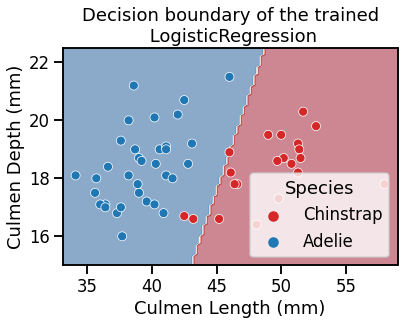

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from helpers.plotting import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    modelGS, data_test, response_method="predict", cmap="RdBu_r", alpha=0.5
)
sns.scatterplot(
    data=penguins_test, x=culmen_columns[0], y=culmen_columns[1],
    hue=target_column, palette=["tab:red", "tab:blue"])
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

In [13]:
GS_results = pd.DataFrame(modelGS.cv_results_)
GS_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011802,0.002059,0.003751,0.000872,0.01,{'logisticregression__C': 0.01},0.727273,0.696970,0.757576,0.727273,0.71875,0.725568,0.019466,4
1,0.008717,0.005162,0.001934,0.000586,0.1,{'logisticregression__C': 0.1},0.909091,0.939394,0.939394,1.000000,1.00000,0.957576,0.036364,1
2,0.005085,0.000375,0.001317,0.000068,1,{'logisticregression__C': 1},0.969697,0.939394,0.939394,0.969697,0.96875,0.957386,0.014695,2
3,0.005484,0.000282,0.001273,0.000110,10,{'logisticregression__C': 10},0.969697,0.939394,0.939394,0.969697,0.96875,0.957386,0.014695,2


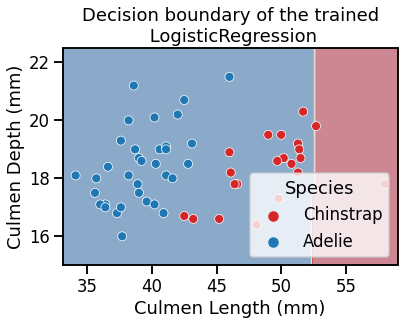

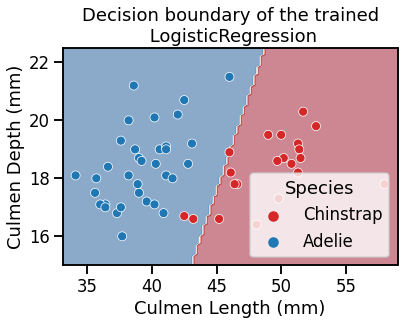

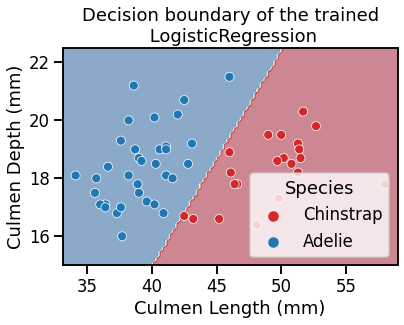

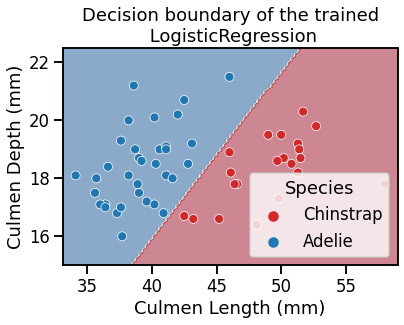

In [16]:
for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    logistic_regression.fit(data_train, target_train)
    accuracy = logistic_regression.score(data_test, target_test)
    DecisionBoundaryDisplay.from_estimator(
    logistic_regression, data_test, response_method="predict", cmap="RdBu_r", alpha=0.5
)
    sns.scatterplot(
        data=penguins_test, x=culmen_columns[0], y=culmen_columns[1],
        hue=target_column, palette=["tab:red", "tab:blue"])
    _ = plt.title("Decision boundary of the trained\n LogisticRegression")

In [17]:
# solution
weights_ridge = []
for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    logistic_regression.fit(data_train, target_train)
    coefs = logistic_regression[-1].coef_[0]
    weights_ridge.append(pd.Series(coefs, index=culmen_columns))

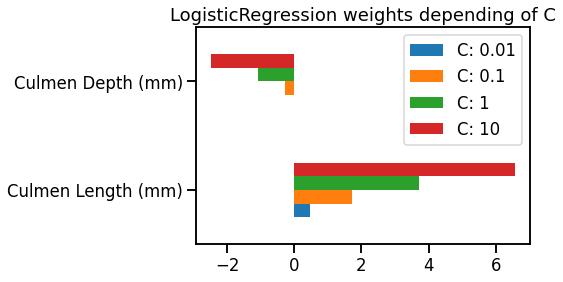

In [18]:
weights_ridge = pd.concat(
    weights_ridge, axis=1, keys=[f"C: {C}" for C in Cs])
weights_ridge.plot.barh()
_ = plt.title("LogisticRegression weights depending of C")